In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def showGrayImage(img):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.imshow(img, cmap='gray')

colors = {
    'Red': (255, 0, 0),
    'Green': (0, 255, 0),
    'Blue': (0, 0, 255),
    'Cyan': (0, 255, 255),
    'Magenta': (255, 0, 255),
    'Yellow': (255, 255, 0),
    'White': (255, 255, 255),
    'Black': (0, 0, 0),
    'Gray': (125, 125, 125),
    'Random': np.random.randint(0,255,(3,)),
    'DarkGray': (50, 50, 50),
    'LightGray': (220, 220, 220)
}

# Geometric Transformations of images

2 key functions to perform image geometric transformations are `cv2.warpAffine()` and `cv2.warpPerspective()`.

The `cv2.warpAffine()` function transforms the source image by using the following **2x3M** transformation matrix:

dst(x, y) = src(M11x + M12y + M13, M21x + M22y + M23)

The `cv2.warpPerspective()` function transforms the source image using the following 3x3 transformation matrix:

dst(x, y) = src(M11x + M12y + M13)/(M31x + M32y + M33), (M21x + M22y + M23)/(M31x + M32y + M33)

## Scaling an Image

`cv2.resize()` Rescale image with scaling factors `fx` and `fy`.

[Text(0.5, 1.0, 'lenna RGB. Size: (256, 256, 3)')]

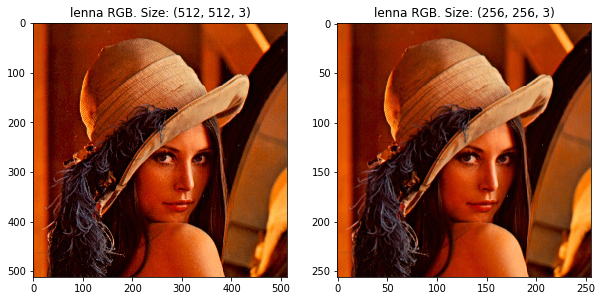

In [27]:
lenna = cv2.imread('D:/Data/DIP4E/lenna-RGB.tif', cv2.IMREAD_COLOR)
lenna = cv2.cvtColor(lenna, cv2.COLOR_BGR2RGB)

lenna2 = cv2.resize(lenna, None, fx=0.5, fy=.5, interpolation=cv2.INTER_LINEAR)

fig, (ax1, ax2) = plt.subplots(figsize=(10, 8), nrows=1, ncols=2)
ax1.imshow(lenna)
ax1.set(title='lenna RGB. Size: {}'.format(lenna.shape))
ax2.imshow(lenna2)
ax2.set(title='lenna RGB. Size: {}'.format(lenna2.shape))

## Translating an Image

The transformation matrix should be defined before calling `cv2.warpAffine()`

\begin{split}
M &= \begin{bmatrix}
    1 & 0 & t_x \\
    0 & 1 & t_y
\end{bmatrix}
\end{split}


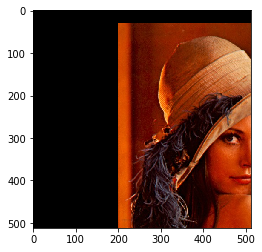

In [28]:
height, width = lenna.shape[:2]
M = np.float32([[1, 0, 200], [0, 1, 30]])
tlenna = cv2.warpAffine(lenna, M, (width, height))
plt.imshow(tlenna)

## Rotating an Image

We use the function `cv2.getRotateMatrix2D()` to build the 2x3 transformation matrix. The matrix will rotate the image at the desired angle (in degrees), where positive value of degree indecate a counter-clockwise rotation. 

We will rotate lenna image 30 degrees around the center point of the image, with the scale factor of 1.

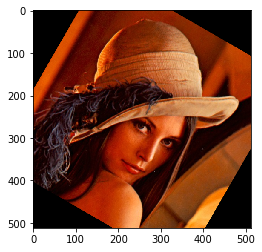

In [36]:
height, width = lenna.shape[:2]
M = cv2.getRotationMatrix2D((width/2.0, height/2.0), -30, 1)
tlenna = cv2.warpAffine(lenna, M, (width, height))
plt.imshow(tlenna)

### Drawing using OpenCV

Create an image size (500, 500) with X

In [ ]:
image = np.zeros((400, 400, 3), dtype='uint8')
image[:] = (220, 220, 220)
cv2.line(image, (0, 0), (400, 400), colors['Blue'], thickness=3)
cv2.line(image, (0, 400), (400, 0), colors['Green'], thickness=3)
cv2.line(image, (200, 0), (200, 400), colors['Red'], 3)
cv2.line(image, (0, 200), (400, 200), colors['Yellow'], 10)
showGrayImage(image)